In [219]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas
import cv2

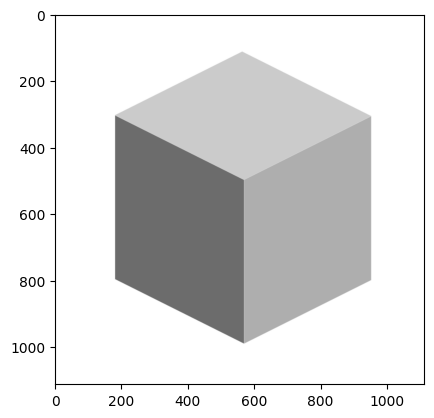

In [ ]:
path = "./cube.png"
img = plt.imread(path)

plt.imshow(img)
plt.show()

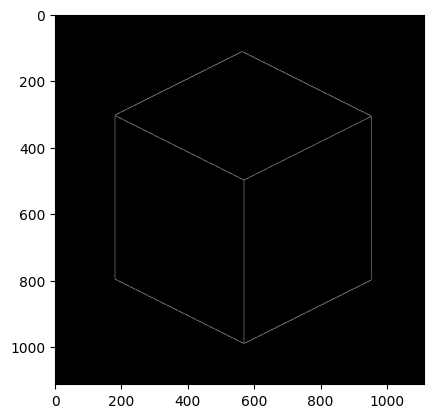

In [221]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# edges = cv2.Canny(img, threshold1=100, threshold2=600)
edges = cv2.Canny(img, threshold1=100, threshold2=600)
plt.imshow(edges, cmap="grey")
plt.show()

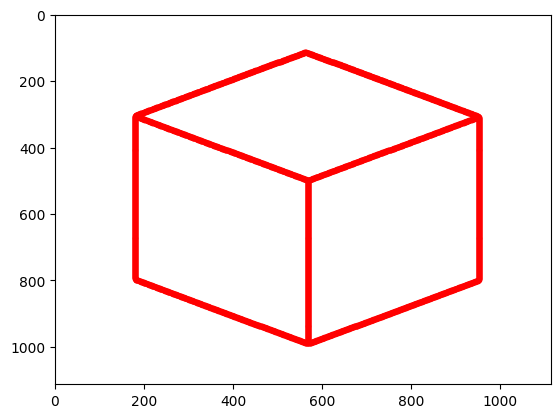

In [222]:
rows, cols = img.shape
y, x = np.where(edges)

plt.plot(x, y, 'r.')
plt.ylim(0, rows)
plt.xlim(0, cols)
plt.gca().invert_yaxis()
plt.show()

In [419]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

theta = np.arange(180)*np.pi/180
r = x*np.cos(theta)+y*np.sin(theta)

theta = np.tile(theta, x.shape[0])
r = r.flatten()

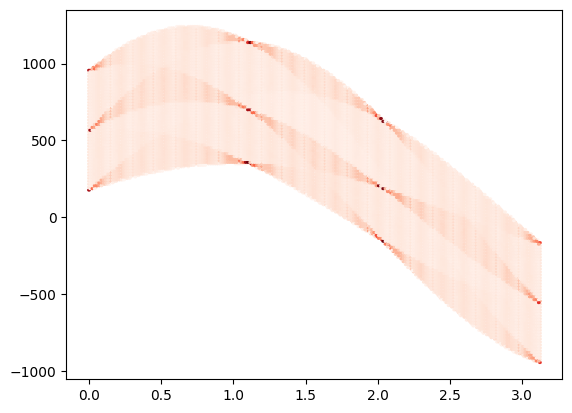

In [420]:
plt.hexbin(theta, r, gridsize=200, cmap='Reds', mincnt=1)
plt.show()

In [473]:
def group_values(values, num_bins=620):
    bin_edges = np.linspace(np.min(values), np.max(values), num_bins+1)
    bin_indices = (np.digitize(values, bin_edges) - 1)%num_bins
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    grouped_values = bin_centers[bin_indices]
    return grouped_values

theta_g = group_values(theta)
r_g = group_values(r)

In [474]:
coords = np.stack((theta_g, r_g), axis=1)

unique_rows, counts = np.unique(coords, axis=0, return_counts=True)
sorted_indices = np.argsort(-counts)
coords = unique_rows[sorted_indices]
counts = counts[sorted_indices]
coords

array([[ 2.04328792e+00, -1.56938607e+02],
       [ 2.51946723e-03,  5.66331854e+02],
       [ 2.51946723e-03,  1.81763658e+02],
       ...,
       [ 5.92074798e-01,  1.23668009e+03],
       [ 1.23705841e+00,  2.87608115e+02],
       [ 2.87975104e+00,  3.35814167e+01]])

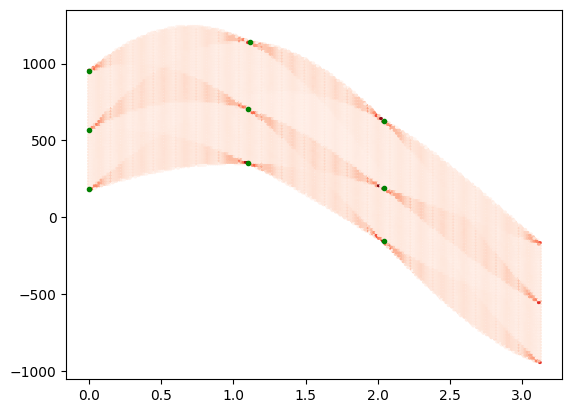

In [478]:
n_lines = 9

lines = coords[:n_lines]
theta_c, r_c = lines[:, 0], lines[:, 1]

plt.plot(theta_c, r_c, 'g.')
plt.hexbin(theta, r, gridsize=200, cmap='Reds', mincnt=1)
plt.show()

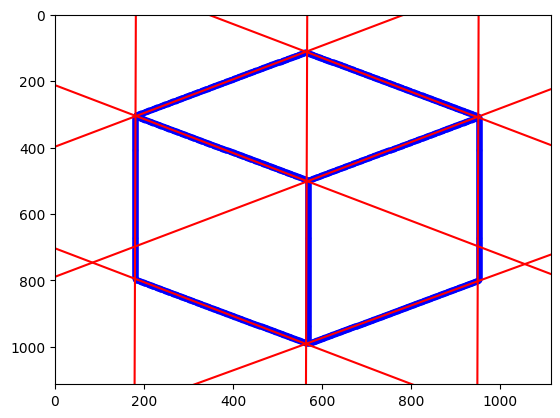

In [480]:
plt.plot(x, y, 'b.')

for theta_c, r_c in lines:
    sin_t = np.sin(theta_c)
    cos_t = np.cos(theta_c)

    if sin_t >= cos_t:
        x0, x1 = 0, cols
        y0 = (r_c - x0*cos_t) / sin_t
        y1 = (r_c - x1*cos_t) / sin_t
    else:
        y0, y1 = 0, rows
        x0 = (r_c - y0*sin_t) / cos_t
        x1 = (r_c - y1*sin_t) / cos_t

    plt.plot([x0, x1], [y0, y1], "r-")

plt.ylim(0, rows)
plt.xlim(0, cols)
plt.gca().invert_yaxis()
plt.show()